# Load the dataset

In [157]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Clean the features

Name, Ticket, Fare and Cabin don't add any siginificance value for pridiction of the survival of person. So, droping them from the datset.

In [158]:
df = df.drop('Name', axis=1)
df = df.drop('Ticket', axis=1)
df = df.drop('Fare', axis=1)
df = df.drop('Cabin', axis=1)
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,1,0,3,male,22.0,1,0,S
1,2,1,1,female,38.0,1,0,C
2,3,1,3,female,26.0,0,0,S
3,4,1,1,female,35.0,1,0,S
4,5,0,3,male,35.0,0,0,S


Adding another feature 'Family' to the existing dataset indicating number of people in the family by adding Parch + SibSp + 1(incuding the person) and removing the 2 features 'SibSp' and 'Parch'.

In [159]:
df['Family'] = df['SibSp'] + df['Parch'] + 1
df = df.drop('SibSp', axis=1)
df = df.drop('Parch', axis=1)
df.head()

,PassengerId,Survived,Pclass,Sex,Age,Embarked,Family
0,1,0,3,male,22.0,S,2
1,2,1,1,female,38.0,C,2
2,3,1,3,female,26.0,S,1
3,4,1,1,female,35.0,S,2
4,5,0,3,male,35.0,S,1


In [160]:
df['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [161]:
df['Sex'].unique()

array(['male', 'female'], dtype=object)

1. Mapping feature 'Sex' categorical values to numerical values(male - 1, female -2)
2. Mapping feature 'Embarked' categorical values to (S-1, C-2, Q-3)

In [162]:
# Mapping for embarked

Embarked_values = { "S": 1, "C": 2, "Q": 3 }
df['Embarked'] = df['Embarked'].map(lambda e: e if pd.isna(e) else Embarked_values[e])


In [163]:
# Mapping for gender

Gender_values = {'male': 1, 'female': 2}
df['Sex'] = df['Sex'].map(lambda s: s if s is pd.isna(s) else Gender_values[s])

# Removing Outliers

Removing NaN values from the dataset

In [164]:
features = list(df.columns.values)

for feature in features:
    print("{0} : {1}".format(feature, sum(pd.isnull(df[feature]))))

PassengerId : 0
Survived : 0
Pclass : 0
Sex : 0
Age : 177
Embarked : 2
Family : 0


In [165]:
# We found 177 NaN values in the 'Age' feature. We are substuting Nan values with the median Age value.
df['Age'] = df['Age'].fillna(df['Age'].median())

# We found 2 NaN values in the 'Embarked' feature. We are substuting Nan values with mode Embark witch is S
# which has a key-pair value S: 1.
print(df['Embarked'].mode())
df['Embarked'] = df['Embarked'].fillna(1)

0    1.0
dtype: float64


In [166]:
# Recheching NaNs
for feature in features:
    print("{0} : {1}".format(feature, sum(pd.isnull(df[feature]))))

PassengerId : 0
Survived : 0
Pclass : 0
Sex : 0
Age : 0
Embarked : 0
Family : 0


# EDA

In [167]:
# plotting the histogram for the dataset.
df.head()

,PassengerId,Survived,Pclass,Sex,Age,Embarked,Family
0,1,0,3,1,22.0,1.0,2
1,2,1,1,2,38.0,2.0,2
2,3,1,3,2,26.0,1.0,1
3,4,1,1,2,35.0,1.0,2
4,5,0,3,1,35.0,1.0,1


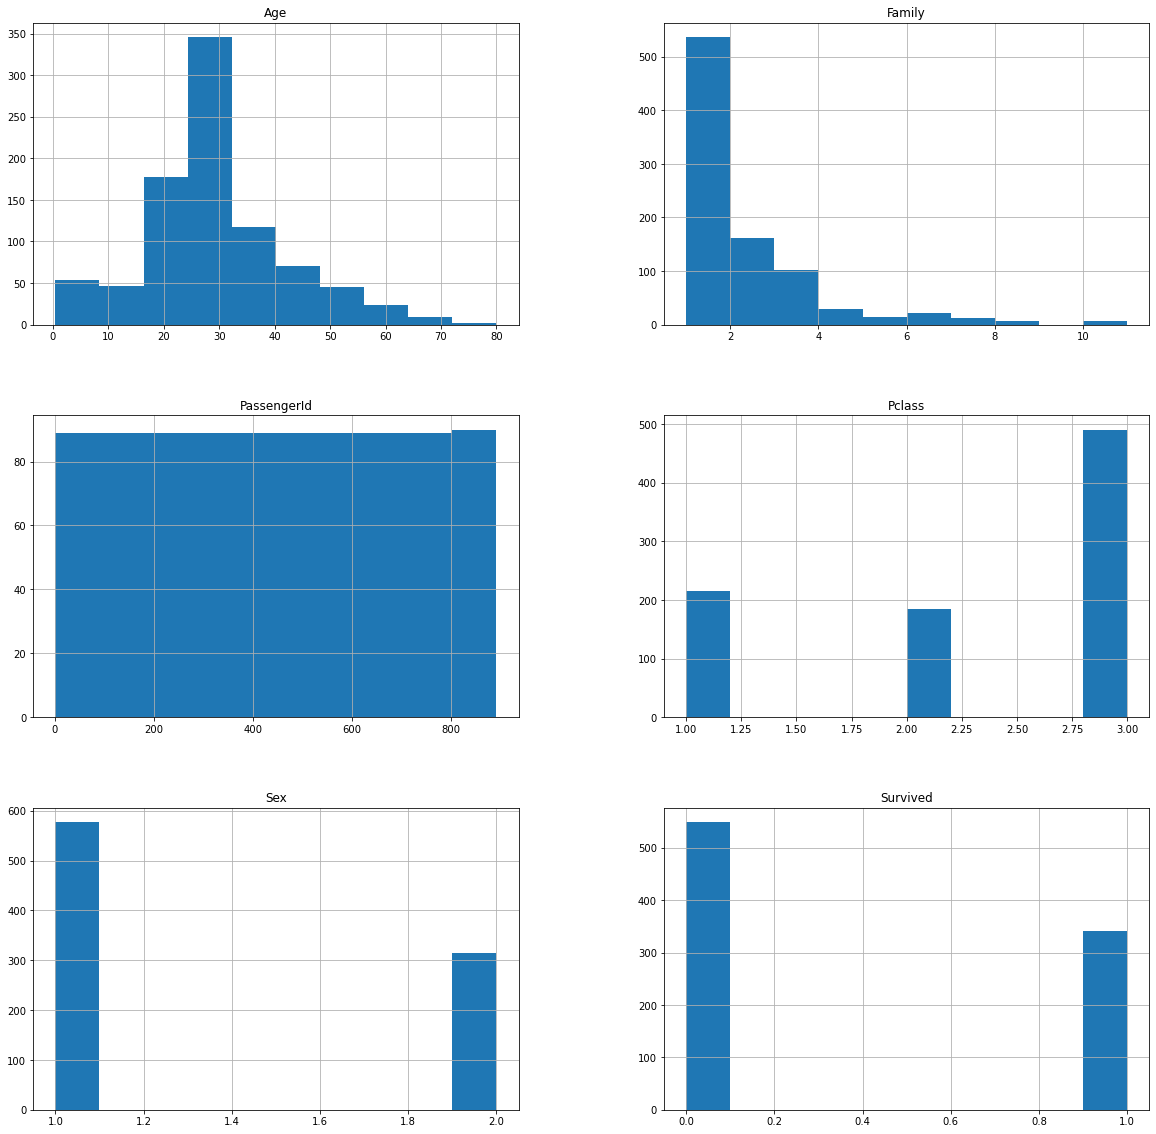

In [117]:
# viusalizing the distribution of feature values in dataset
p = df.hist(figsize = (20, 20))

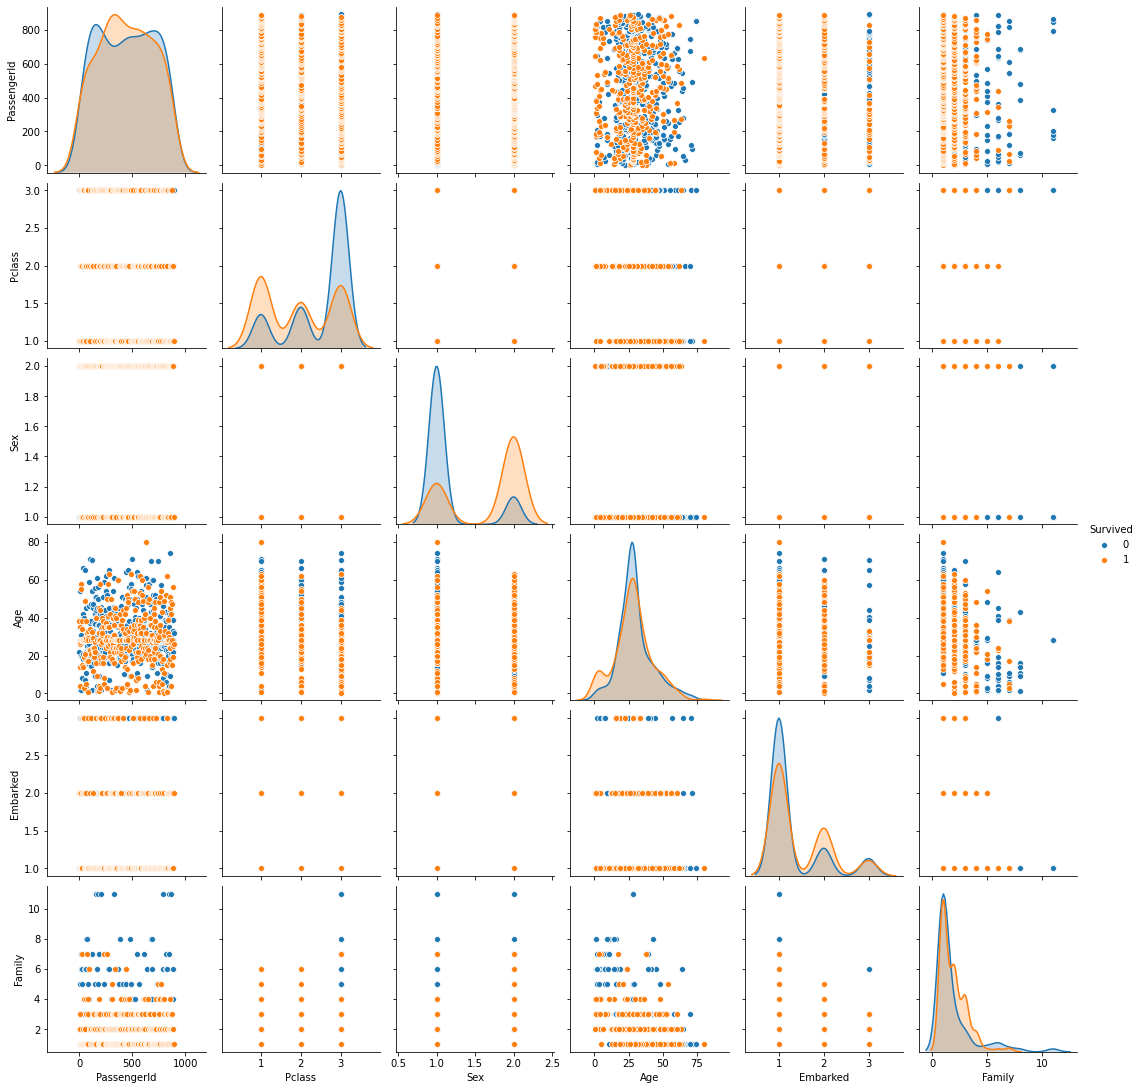

In [168]:
# pairplots

import seaborn as sns
sns.pairplot(df, hue = "Survived")

Data can be best seperated using the pair plots (Family, passengerId) (Family, Age)

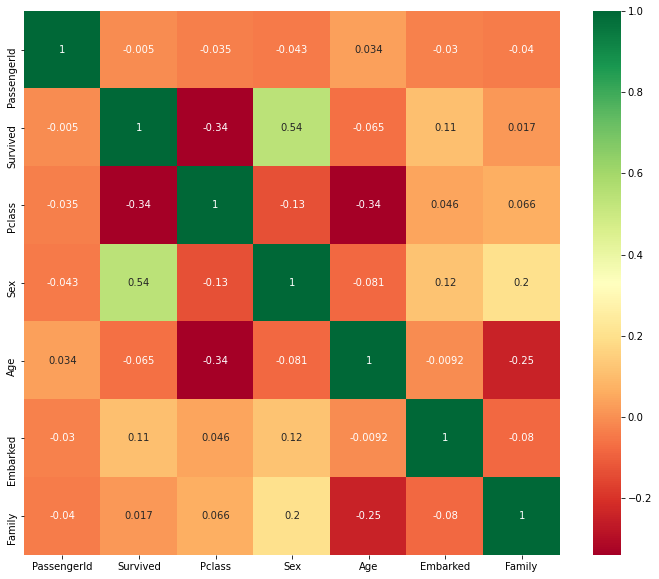

In [169]:
# finding the correlation between the fetures using heat map

plt.figure(figsize=(12,10))
sns.heatmap(df.corr(), annot=True,cmap ='RdYlGn')

We can see there is high correlation between Sex and Survived with value 0.54 among the other attributes.

# Train Split Data

In [192]:

X = df.drop("Survived" , axis = 1)
y = df["Survived"]

# performing cross-validation split
from sklearn.model_selection import train_test_split

# if variable y is a binary categorical variable with values 0 and 1 and there are 25% of zeros and 75%  
# of ones, stratify=y will make sure that your random split has 25% of 0's and 75% of 1's.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0, stratify = y)

# KNN Classifier

## 1. Finding best value for K

In [193]:
from sklearn.neighbors import KNeighborsClassifier

train_scores = []
test_scores = []

for i in range(1,16):
    knn = KNeighborsClassifier(i)
    knn.fit(X_train, y_train)
    train_scores.append(knn.score(X_train, y_train))
    test_scores.append(knn.score(X_test, y_test))
    

In [194]:
# taking the k value with max_test score

max_test_score = max(test_scores)
print(max_test_score)

0.6089385474860335


In [195]:
test_score_index = [i+1 for i, v in enumerate(test_scores) if v == max_test_score]
print("max test score {0}% for k = {1}".format(max_test_score*100, test_score_index))

max test score 60.893854748603346% for k = [2]


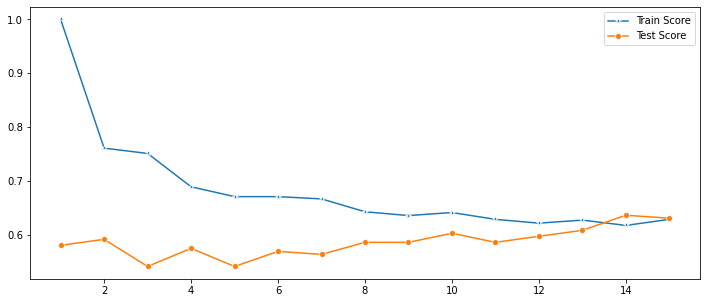

In [177]:
# Result visualization

plt.figure(figsize=(12,5))
p = sns.lineplot(range(1,16),train_scores,marker='*',label='Train Score')
p = sns.lineplot(range(1,16),test_scores,marker='o',label='Test Score')

## 2. Applying KNN Classifier

In [204]:
knn = KNeighborsClassifier(36)
knn.fit(X_train, y_train)
knn.score(X_test, y_test)

0.6256983240223464

# Performance Analysis

## 1. Confusion Matrix

Text(0.5, 15.0, 'Predicted label')

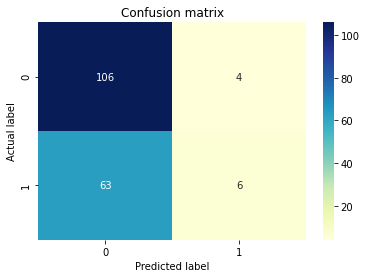

In [205]:
y_pred = knn.predict(X_test)

from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

## 2. Classification Report

In [206]:
#import classification_report

from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

             precision    recall  f1-score   support

          0       0.63      0.96      0.76       110
          1       0.60      0.09      0.15        69

avg / total       0.62      0.63      0.53       179



## 3. ROC - AUC

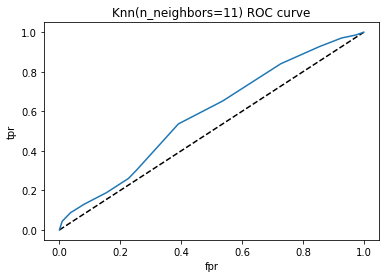

In [207]:
from sklearn.metrics import roc_curve
y_pred_proba = knn.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='Knn')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('Knn(n_neighbors=11) ROC curve')
plt.show()

In [208]:
#Area under ROC curve

from sklearn.metrics import roc_auc_score
print("roc_auc score: {0}".format(roc_auc_score(y_test,y_pred_proba)))

roc_auc score: 0.5818840579710145


# Hyper Parameter optimization

In [203]:
#import GridSearchCV

from sklearn.model_selection import GridSearchCV

#In case of classifier like knn the parameter to be tuned is n_neighbors
param_grid = {'n_neighbors':np.arange(1,50)}
knn = KNeighborsClassifier()
knn_cv= GridSearchCV(knn,param_grid,cv=5)
knn_cv.fit(X,y)

print("Best Score:" + str(knn_cv.best_score_))
print("Best Parameters: " + str(knn_cv.best_params_))

Best Score:0.611672278338945
Best Parameters: {'n_neighbors': 36}
